Please **submit this Jupyter notebook through Canvas** no later than **Monday November 19, 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

**Jordan Earle** (12297127)

**Natasja Wezel** (11027649)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

-----
# Exercise 1

# (a)
We have the table of data in the next cell.

Using `numpy.linalg.lstsq()`, fit a straight line, a quadratic function, and a cubic function to these data. Plot the data and your fitted functions in a graph.

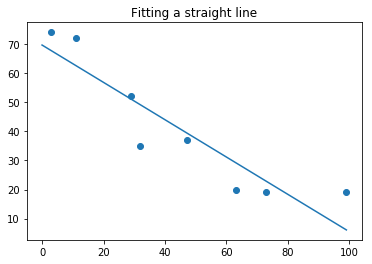

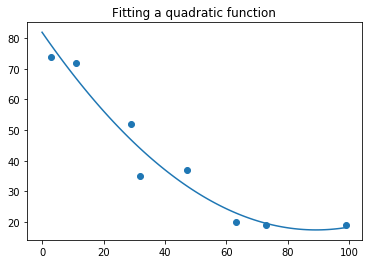

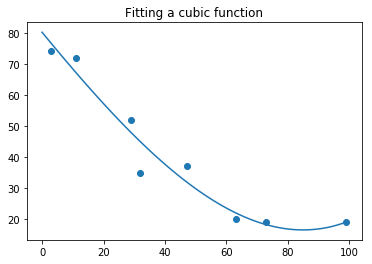

In [98]:
t = np.array([3, 11, 29, 32, 47, 63, 73, 99], dtype=np.float)
w = np.array([74, 72, 52, 35, 37, 20, 19, 19], dtype=np.float)

# make a line y = ax + b
A = np.vstack([t, np.ones(len(t))]).transpose()

m, b = np.linalg.lstsq(A, w, rcond=None)[0]

linemxb = []
squaremxb = []
cubemxb = []

for x in range(0, 100):
    linemxb.append((m*x) + b)
    
plt.figure(0)
plt.title("Fitting a straight line")
plt.scatter(t,w)
plt.plot(range(0,100), linemxb)

# make a quadratic function y = ax^2 + bx + c
tsquare = t**2

Asquared = np.vstack([tsquare, A.transpose()]).transpose()

a, b , c = np.linalg.lstsq(Asquared, w, rcond=None)[0]

for x in range(0, 100):
    squaremxb.append(a*(x**2) + b*x + c)

plt.figure(1)
plt.title("Fitting a quadratic function")
plt.scatter(t,w)
plt.plot(range(0,100), squaremxb)

# make a cubed function y = ax^3 + bx^2 + cx + d
tcubed = t**3

Acubed = np.vstack([tcubed, Asquared.transpose()]).transpose()

a,b,c,d = np.linalg.lstsq(Acubed, w, rcond=None)[0]

for x in range(0, 100):
    cubemxb.append(a*(x**3) + b*(x**2) + c * x + d)

plt.figure(2)
plt.title("Fitting a cubic function")
plt.scatter(t,w)
plt.plot(range(0,100), cubemxb)


## (b)
Compute the condition number of the associated Vandermonde matrix in each case.

In [3]:
Vm1 = np.vstack([np.ones(len(t)),t]).transpose()
Vm2 = np.vstack([np.ones(len(t)),t,tsquare]).transpose()
Vm3 = np.vstack([np.ones(len(t)),t,tsquare,tcubed]).transpose()

# so cond(x, p = None) uses 2 norm
condition_Vm1 = np.linalg.cond(Vm1)
print(condition_Vm1)

condition_Vm2 = np.linalg.cond(Vm2)
print(condition_Vm2)

condition_Vm3 = np.linalg.cond(Vm3)
print(condition_Vm3)

95.97978844376205
10562.214789189244
1192946.8771565198


----
# Exercise 2
Planets follow an elliptical orbit, which can be represented in a Cartesian $(x,y)$-coordinate system by the equation
$$ ay^2 + bxy + cx + dy + e = x^2. $$

## (a)
Use `numpy.linalg.lstsq()` to determine the orbital parameters $a,b,c,d,e$ for the table of observations given below.
In addition, plot the resulting orbit and the data points in the $(x,y)$-plane.

In [82]:
# i don't know how to set the colors for the contourplot properly and that's why we need a list like this
color_list = ["red", "blue","green","orange","black", "sandybrown", "grey", "darkgreen", "darkblue", "purple"]

def solve_cartesian(x,y):
    # in A theres 5 columns for yy, xy, x, y, 1
    A = np.stack([y*y, x*y, x, y, np.ones(len(x))]).transpose()

    # these are the coefficients for the function , found by the least squares method
    a,b,c,d,e = np.linalg.lstsq(A, x*x, rcond=-1)[0]

    print("The coefficients are: ", a,b,c,d,e)

    # how to make a proper linspace for this function?
    linspace_x = np.linspace(-1, 2, 100)
    linspace_y = np.linspace(-1, 2, 100)

    X, Y = np.meshgrid(linspace_x,linspace_y)

    # i'm not sure if this is right I saw it on stackoverflow somewhere
    F = a * Y**2 + b * X * Y + c * X + d * Y + e - X**2 

    return X,Y,F

The coefficients are:  -2.635625483712111 0.14364618259889395 0.5514469631403582 3.222940338105902 -0.4328942702644514


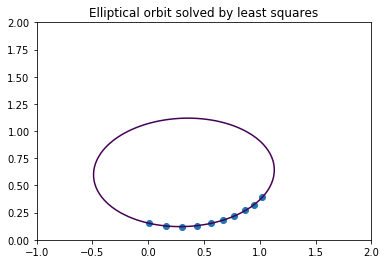

In [35]:
x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01], dtype=np.float)
y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15], dtype=np.float)

X,Y,F = solve_cartesian(x,y)

# plot it
plt.contour(X,Y,F,[0.0])
plt.title("Elliptical orbit solved by least squares")
plt.scatter(x,y)
plt.xlim(-1,2)
plt.ylim(0,2)
plt.show()


## (b)
This least squares problem is nearly rank-deficient. To see what effect this has on the solution, perturb the input data slightly by adding random noise between -0.005 and 0.005 (using, for instance, `numpy.random.rand`), and solve the least squares problem with the perturbed data. Compare the new values for the parameters with those from (a). What effect does this difference have on the plot of the orbit?

The coefficients are:  -2.6356254837121 0.14364618259889161 0.556815660941014 3.2062521464920746 -0.4242970225169741
The coefficients are:  -2.6356254837120727 0.14364618259888529 0.5416428143979478 3.2571899700108498 -0.4511251019042777
The coefficients are:  -2.6356254837120705 0.14364618259888362 0.5503450480628307 3.276571774672312 -0.466073550139001
The coefficients are:  -2.63562548371211 0.14364618259890172 0.56581008318969 3.398667475758274 -0.5494917185979786
The coefficients are:  -2.6356254837120563 0.1436461825988793 0.5929027748658902 3.318844273335576 -0.5070044302517666
The coefficients are:  -2.6356254837120585 0.14364618259888795 0.5688104928072686 3.4556905094162755 -0.5880735417854512
The coefficients are:  -2.635625483712185 0.1436461825989298 0.5484729954511429 3.432072315913312 -0.5657845877292564
The coefficients are:  -2.635625483712073 0.14364618259890793 0.6360558900253472 3.544801905029033 -0.6716032740458149
The coefficients are:  -2.6356254837120745 0.14364

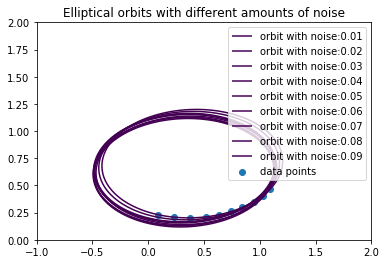

Apparently a little bit of noise doesn't make a big difference. The coefficients of the formula don't differ a lot with the coefficients the formula had without perturbed data.
NB: Using different colors here would probably not have made the graph more clear.


In [89]:
for noise in range(1, 10):
    
    x2 = x + np.random.rand() * noise/100 - 0.005
    y2 = y + np.random.rand() * noise/100 - 0.005

    X, Y, F = solve_cartesian(x2,y2)

    # plot it
    CS = plt.contour(X,Y,F,[0.0])
    
    CS.collections[i].set_label("orbit with noise:" + str(noise/100))

plt.scatter(x2,y2, label="data points")
plt.xlim(-1,2)
plt.ylim(0,2)
plt.legend()
plt.title("Elliptical orbits with different amounts of noise")
plt.show()

print("Apparently a little bit of noise doesn't make a big difference. The coefficients of the formula don't differ a lot with the coefficients the formula had without perturbed data.")
print("NB: Using different colors here would probably not have made the graph more clear.")

The coefficients are:  -2.6356254837120474 0.14364618259888962 0.6299535995100314 3.6161985647155848 -0.7185781358544422
The coefficients are:  -2.6356254837120767 0.14364618259888828 0.5909962618693736 3.2435526041598406 -0.45878642406211556
The coefficients are:  -2.6356254837119746 0.1436461825988562 0.6915909861236557 4.679579052865501 -1.5904685560654974
The coefficients are:  -2.6356254837119852 0.14364618259885487 0.7905955061861448 5.178772509347038 -2.1066532657202157
The coefficients are:  -2.6356254837120345 0.14364618259885598 1.2687785381608296 4.065196286404045 -1.3895143517070911
The coefficients are:  -2.6356254837122273 0.1436461825989539 1.1947052127633193 4.840548392714414 -2.008601198534186
The coefficients are:  -2.63562548371216 0.14364618259893258 1.7166175954389034 4.265937674199419 -1.9129185310149843
The coefficients are:  -2.635625483712089 0.14364618259890194 1.6468634547226837 4.381392964492812 -1.9475689052475245
The coefficients are:  -2.6356254837119004 

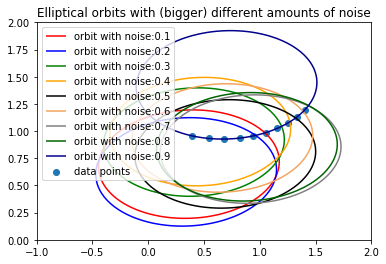

differences
a: -8.126832540256146e-14 
b: 2.042810365310288e-14 
c: -0.004774766944265374 
d: 0.018558387844657798 
e: -0.009942488074178413
The coefficients here differ more from the ones in exercise a. We see that the first two coefficients stay pretty much the same all the time. We can also see that the orbits are in different places. The first orbit (with noise 0.1) still fits the data quite good. But the other ones are different. The differences differ each time you run this block of code, since the random noise can be pretty big, but doesn't have to be.


In [92]:
for noise in range(1, 10):
    
    x2 = x + np.random.rand() * noise/10 - 0.005
    y2 = y + np.random.rand() * noise/10 - 0.005

    X, Y, F = solve_cartesian(x2,y2)

    # plot it
    CS = plt.contour(X,Y,F,[0.0], colors=color_list[noise - 1])
    
    CS.collections[i].set_label("orbit with noise:" + str(noise/10))

plt.scatter(x2,y2, label="data points")
plt.xlim(-1,2)
plt.ylim(0,2)
plt.legend()
plt.title("Elliptical orbits with (bigger) different amounts of noise")
plt.show()

print("differences\na:", differences[0],"\nb:", differences[1],"\nc:",differences[2],"\nd:",differences[3],"\ne:",differences[4])
print("The coefficients here differ more from the ones in exercise a. We see that the first two coefficients stay pretty much the same all the time. We can also see that the orbits are in different places. The first orbit (with noise 0.1) still fits the data quite good. But the other ones are different. The differences differ each time you run this block of code, since the random noise can be pretty big, but doesn't have to be.")

## (c)
Can you explain this behaviour?

## (d)
Solve the same least squares problem again, for both the original *and* the perturbed data, this time using a routine specifically designed to deal with rank deficiencies. An example is `numpy.linalg.lstsq`, with the argument `rcond` as tolerance. Experiment with various tolerances, say $10^-k$ for $k \in \{1, ..., 5\}$. Compare the behaviour of the two solutions (one for the original input data, one for the perturbed data). How well do the resulting orbits fit the data points as the tolerance varies?

0.10441934702027524 0.340136609715485 0.8917887094168335 0.20248793097774528 -0.1717893875606339
0.41916487843578665 0.8768712738778587 0.5253450105330469 0.756138531245889 -0.16744777429279734
-2.635625483712111 0.14364618259889395 0.5514469631403582 3.222940338105902 -0.4328942702644514
-2.635625483712111 0.14364618259889395 0.5514469631403582 3.222940338105902 -0.4328942702644514
-2.635625483712111 0.14364618259889395 0.5514469631403582 3.222940338105902 -0.4328942702644514


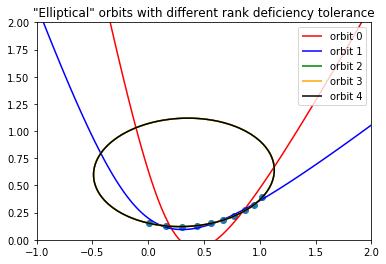

In [97]:
# in A theres 5 columns for yy, xy, x, y, 1
A = np.stack([y*y, x*y, x, y, np.ones(len(x))]).transpose()

for k in range(5):
    coefficient = 10**-(k + 1)
    
    # these are the coefficients for the function , found by the least squares method
    a,b,c,d,e = np.linalg.lstsq(A, x*x, rcond=coefficient)[0]

    print(a,b,c,d,e)

    # how to make a proper linspace for this function?
    linspace_x = np.linspace(-1, 2, 100)
    linspace_y = np.linspace(-1, 2, 100)

    X, Y = np.meshgrid(linspace_x,linspace_y)

    # i'm not sure if this is right I saw it on stackoverflow somewhere
    F = a * Y**2 + b * X * Y + c * X + d * Y + e - X**2 

    # plot it
    CS = plt.contour(X,Y,F,[0.0], colors=color_list[k])

    CS.collections[0].set_label("orbit " + str(k))

    
plt.scatter(x,y)
plt.xlim(-1,2)
plt.ylim(0,2)
plt.legend()
plt.title("\"Elliptical\" orbits with different rank deficiency tolerance")
plt.show()

